In [408]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go

In [409]:
order = 3

In [410]:
def print_all(*objects):
    for i in objects:
        print(f'obj: {i}')

In [411]:
def function(*, x, theta):
    y = np.zeros_like(x, dtype= float)
    for i in range(len(theta)):
        y += theta[i] * x**i
    return y

In [412]:
function(x= np.arange(100), theta= [[0.09], [0.75], [0.16], [0]]) [-1]

1642.5

In [413]:
def normalized(vector: np.ndarray) -> np.ndarray:
    mean = np.mean(vector)
    standard_deviation = np.std(vector)
    normalized_vector = (vector - mean) / standard_deviation
    return normalized_vector

In [414]:
class Linear_Regression_Multivariables:
    def __init__(self, *, y_true) -> None:
        self.m = len(y_true)

    def predict(self, *, theta, normalized_input):
        y_pred = np.matmul(normalized_input, theta)
        return y_pred
    
    def compute_loss_function(self, *, y_true, y_pred):
        E = y_pred - y_true
        J = np.sum((E)**2)/ (2*self.m)
        return J
    
    def update_params(self, *, theta, lr, y_pred, y_true, normalized_input):
        E = y_pred - y_true
        dJ_dtheta = np.dot(normalized_input.T, E) / (2*self.m)
        theta_updated = theta - lr*dJ_dtheta
        return theta_updated
    
    def train(self, *, epoch, theta, normalized_input, y_true, lr):
        J_array = []
        for i in range(epoch):
            y_pred = self.predict(theta= theta, 
                                  normalized_input= normalized_input)
            J = self.compute_loss_function(y_true= y_true, 
                                           y_pred= y_pred)
            theta = self.update_params(theta= theta, lr= lr, y_pred= y_pred, 
                                       y_true= y_true, normalized_input= normalized_input)
            J_array.append(J)

        return J_array, theta



In [415]:
df = pd.read_csv('ex3.csv')
df.head()

,x,y
0,0.0,1313.416062
1,1.2,-1281.338337
2,2.4,257.886375
3,3.6,157.168243
4,4.8,1055.041502


In [416]:
x_cols = df.columns[:len(df.columns) - 1]
y_col = df.columns[-1]

In [417]:
x_value = df[x_cols].to_numpy().reshape(-1, )
y_value = df[y_col].to_numpy().reshape(-1, )

In [418]:
mean_x = np.mean(x_value)
std_x = np.std(x_value)
mean_y = np.mean(y_value)
std_y = np.std(y_value)

In [419]:
fig = go.Figure()
fig = fig.add_trace(
    go.Scatter(x= x_value, y= y_value, mode= 'markers')
)
fig.show()

In [420]:
def convert_data(*, input, order):
    ones = np.ones((len(input), order+1))
    for i in range(1, order + 1):
        ones[:, i] = input**i
    return ones


x_normalized = convert_data(input= x_value, order= order)
y_normalized = y_value.reshape(-1, 1)

In [421]:
def true_value(x_normalized, y_normalized):
    XT_X_inv = np.linalg.inv(np.dot(x_normalized.T, x_normalized))
    XT_Y = np.dot(x_normalized.T, y_normalized)
    theta_true = np.dot(XT_X_inv, XT_Y)
    return theta_true

theta_true = true_value(x_normalized, y_normalized)

In [422]:
x_normalized[:, 1:] = np.apply_along_axis(func1d= normalized, arr= x_normalized[:, 1:], axis= 0)
y_normalized = np.apply_along_axis(func1d= normalized, arr= y_value.reshape(-1, 1), axis= 0)

In [423]:
np.random.seed(1)
theta_init = np.random.randn(order + 1, 1) * 10
theta_init

array([[ 16.24345364],
       [ -6.11756414],
       [ -5.28171752],
       [-10.72968622]])

In [424]:
lrm_order = Linear_Regression_Multivariables(y_true= y_normalized)

In [425]:
def inverse_normalized(theta_normalized: np.ndarray, mean_x, std_x, mean_y, std_y) -> np.ndarray:
    # Giải chuẩn hóa các hệ số theta
    theta = np.zeros_like(theta_normalized)
    theta[1:] = theta_normalized[1:] * (std_y / std_x)
    theta[0] = mean_y -  theta_normalized[0] * std_y
    return theta

In [426]:
J_array, theta_train = lrm_order.train(
    epoch= 500000,
    theta= theta_init,
    normalized_input= x_normalized,
    y_true= y_normalized, 
    lr= 0.01 
)


theta_train = inverse_normalized(theta_train, mean_x, std_x, mean_y, std_y)


In [427]:
np.round(theta_true, 1)

array([[123.1],
       [  8.7],
       [  6.2],
       [  0. ]])

In [428]:
np.round(theta_train,2)

array([[ 2.199218e+04],
       [-1.843000e+01],
       [ 7.091200e+02],
       [-1.417000e+01]])

In [429]:
# Generate a range of x values from the minimum to the maximum of the x_col to plot the regression line
# x_range = np.linspace(x_value.min(), x_value.max(), 100)
x_range = x_value

# Compute the corresponding y values for the regression line using the updated parameters (theta)
# The equation of the line is y = theta_0 + theta_1 * x
y_range = function(x= x_range, theta= theta_train)

# Create a new Plotly figure to visualize the data points and the regression line
fig = go.Figure()

# Add a scatter plot for the original data points from the CSV file
fig.add_trace(
    go.Scatter(
        x=x_value,  # X values from the 'x' column
        y=y_value,  # Y values from the 'y' column
        mode='markers',  # Plot style as markers (points)
        marker=dict(symbol='x'),  # Marker style
        name='Data Points'  # Name for the legend
    )
)

# Add a line plot for the regression line calculated from the model
fig.add_trace(
    go.Scatter(
        x=x_range,  # X values for the regression line
        y=y_range,  # Y values for the regression line
        mode='lines',  # Plot style as a line
        name='Regression Line'  # Name for the legend
    )
)

y_range_2 = function(x= x_range, theta= theta_true)
fig.add_trace(
    go.Scatter(
        x=x_range,  # X values for the regression line
        y=y_range_2,  # Y values for the regression line
        mode='lines',  # Plot style as a line
        name='Regression Line'  # Name for the legend
    )
)

In [430]:
x_value_change = np.apply_along_axis(normalized, 0, x_value)
y_value_change = np.apply_along_axis(normalized, 0, y_value)
y = function(x= x_value_change, theta= theta_train)
# Create a new Plotly figure to visualize the data points and the regression line
fig = go.Figure()

# Add a scatter plot for the original data points from the CSV file
fig.add_trace(
    go.Scatter(
        x=x_value_change,  # X values from the 'x' column
        y=y_value_change,  # Y values from the 'y' column
        mode='markers',  # Plot style as markers (points)
        marker=dict(symbol='x'),  # Marker style
        name='Data Points'  # Name for the legend
    )
)

# Add a line plot for the regression line calculated from the model
fig.add_trace(
    go.Scatter(
        x=x_value_change,  # X values for the regression line
        y= y,  # Y values for the regression line
        mode='lines',  # Plot style as a line
        name='Regression Line'  # Name for the legend
    )
)

x_normalized = convert_data(input= x_value_change, order= order)
y_normalized = y_value_change.reshape(-1, 1)

theta_true = true_value(x_normalized, y_normalized)
y = function(x= x_value_change, theta= theta_true)
fig.add_trace(
    go.Scatter(
        x=x_value_change,  # X values for the regression line
        y= y,  # Y values for the regression line
        mode='lines',  # Plot style as a line
        name='Regression Line'  # Name for the legend
    )
)

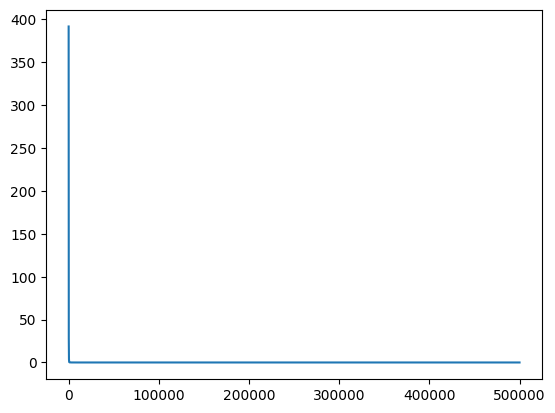

In [431]:
import matplotlib.pyplot as plt

plt.plot(J_array)

In [432]:
J_array[-1]

0.0014375022349247845